In [15]:
import pandas as pd 
import numpy as np 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline




# Singapore AirBnb



Import dataset, 
EDA to visualize data and observe structure, 
Decision tree, 
Predict target. 

In [25]:
data = pd.read_csv('data/listings.csv')


In [28]:
type(data)


pandas.core.frame.DataFrame

In [29]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [30]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

In [32]:
train, test = train_test_split(data, test_size = 0.15)

In [33]:

print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 6720; Test size: 1187


In [34]:
train.shape

(6720, 16)

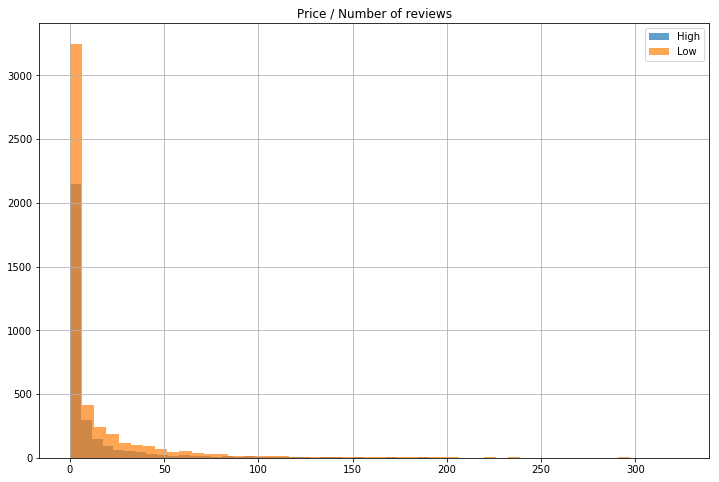

In [39]:
high_price = data[data['price'] >= 150]['number_of_reviews']
low_price = data[data['price'] < 150]['number_of_reviews']

fig = plt.figure(figsize=(12,8))
plt.title("Price / Number of reviews")
high_price.hist(alpha = 0.7, bins = 50, label = 'High')
low_price.hist(alpha = 0.7, bins = 50, label = 'Low')
plt.legend(loc = "upper right")

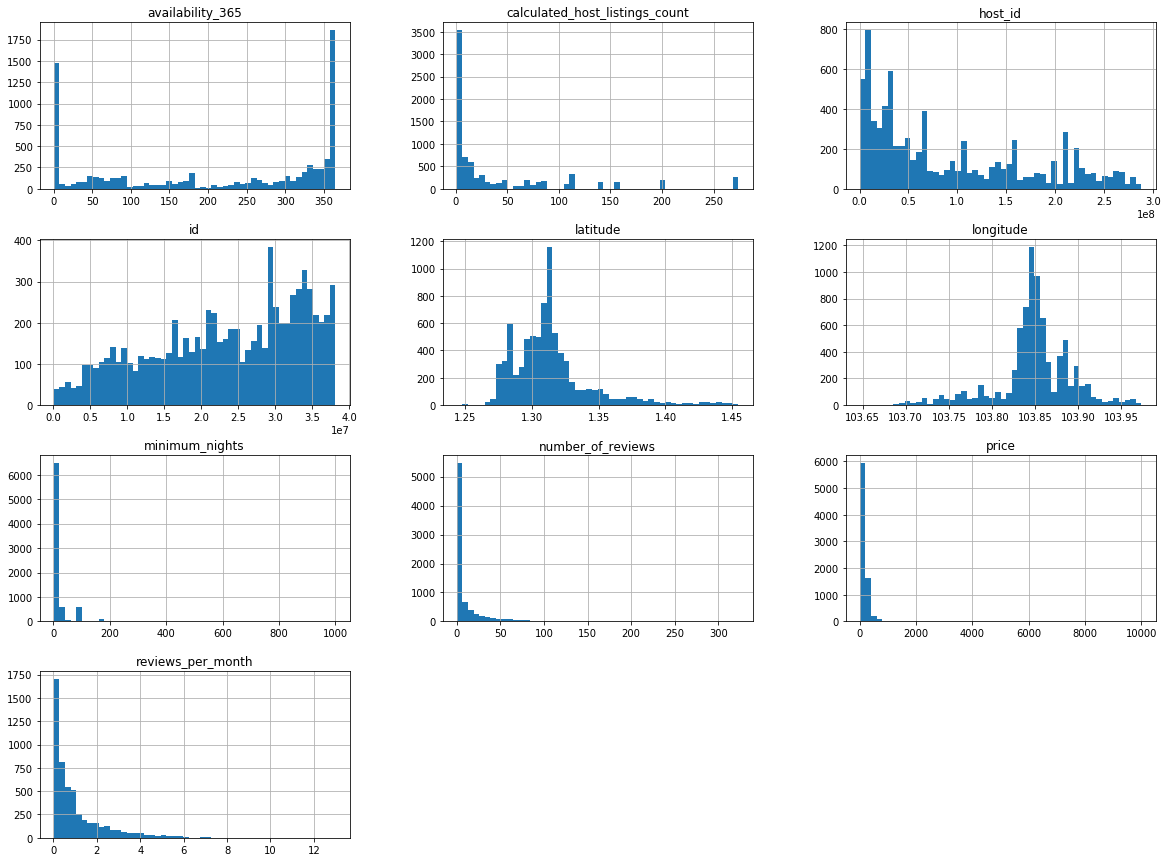

In [40]:
data.hist(bins =50, figsize =(20,15))
plt.show()